In [1]:
#LIBRARIES
import pandas as pd
import re
import numpy as np
from tqdm import tqdm
import math 
## FUZZY
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

## nomalice parameters
from unidecode import unidecode

import spacy  # For preprocessing
from scipy import spatial
from time import time  # To time our operations
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pylab as P

In [2]:
DF_JOB_H = pd.read_excel("data_base_VF.xlsx")


In [3]:
DF_JOB_H["job_history_clean"]
def isNaN(testS):
    return not type(testS) == str and  math.isnan(testS)==True
def convertInt(stringIn):
    try:
        return int(stringIn)
    except ValueError:
        print("error int", stringIn)
        return 2021

In [4]:
isNaN("10")

False

In [5]:
## object maker
def stringToObject(DataFrame):
    #SEPARANDO LOS STRINGS DE CADA TRABAJO

    L = []

    for i in DataFrame.job_history_clean:
        l = str(i).split("},") #convertir en string el job history del individuo y crear lista para separar cada formación
        k = [] #Lista donde se almacenara cada formación x del individuo i
        for job in l: #para cada trabajo
            job = job.replace("[", "").replace("]", "") + "}" #separelos y conviertalas en diccionarios
            k.append(job) #añadalas a la lista de jobs
        L.append(k) 
    #EXTRAER DE MANERA ORDENADA EL JOB HISTORY, LA FECHA DE TERMINACIÓN Y COMIENZO
    K = [] 

    for individuo in tqdm(L): 

        educacion_ind = [] 

        for ins in individuo: 
            print(ins, type(ins))
            ins = ins.replace('"', "'")

            c = {}

            #EXTRAER JOB-TITLE
            if ( len(re.findall("'job_title': '.*?'", ins)) ) > 0:
                c["job_title"] =  re.findall("'job_title': '.*?'", ins)[0].replace("'job_title': ", "").replace("'", "")
                c["job_title"] = str(c["job_title"])
                # c["job_title"] = cleaning(c["job_title"])

            #EXTRAER INICIO
            if ( len(re.findall("'start': '.*?'", ins)) ) > 0:
                c["start"] = re.findall("'start': '.*?'", ins)[0].replace("'start': ", "").replace("'", "")
                c["start"] = convertInt(c["start"][::-1][0:4][::-1]) #SOLO CONSERVAR EL AÑO 

            #EXTRAER FINALIZACIÓN
            if ( len(re.findall("'end': '.*?'", ins)) ) > 0:
                c["end"] = re.findall("'end': '.*?'", ins)[0].replace("'end': ", "").replace("'", "")
                c["end"] = convertInt(c["end"][::-1][0:4][::-1]) #SOLO CONSERVAR EL AÑO

            educacion_ind.append(c) #añado cada formación a la lista de sus educaciones

        K.append(educacion_ind) #añado la educación de cada individuo a una lista general
    return K

    

In [6]:
result = stringToObject(DF_JOB_H)
print(result[0])


', 'end': '2018'} <class 'str'>
 {'job_title': 'comunicación', 'start': '2013', 'end': '2016'} <class 'str'>
 {'job_title': 'ayudante de cátedra', 'start': '2009', 'end': '2015'} <class 'str'>
 {'job_title': 'residente', 'start': '2015', 'end': 'ined'} <class 'str'>
error int ined
 {'job_title': 'analyst', 'start': '2011', 'end': '2013'} <class 'str'>
 {'job_title': 'desarrollo y ejecución de políticas públicas', 'start': '2011', 'end': '2011'} <class 'str'>
 {'job_title': 'ejecutiva de cuentas', 'start': '2009', 'end': '2011'} <class 'str'>
 {'job_title': 'asistente y traductora', 'start': '2008', 'end': 'ined'} <class 'str'>
error int ined
 {'job_title': 'asistencia y orientación al beneficiario', 'start': '2008', 'end': '2008'} <class 'str'>
 {'job_title': 'atención al público y proveedores', 'start': '2005', 'end': '2007'} <class 'str'>
 {'job_title': 'encuestadora', 'start': '2007', 'end': 'ined'}} <class 'str'>
error int ined
{'job_title': 'backend lead', 'start': '2021', 'end': 

In [7]:
type(result[0][0]["start"])

int

In [8]:
len(result)

560

In [9]:

embeddings_dict = {}
# vectors dimention
DIMENTION_DIC = 300
# 6 billions words
#with open("glove.6B."+str(DIMENTION_DIC)+"d.txt", 'r', encoding="utf-8") as f:
# 42 Billion words
with open("glove.42B."+str(DIMENTION_DIC)+"d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        print(word)
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

        

ney/redi-meds
stalwartuk
st-amant
stamp-size
stanchorage
s.t.a.n.d.
standord
starfox64
starle
starmind
star-san
starselite
starsports
starspow
starsshineonme
start/continue
start.html
starthtml
star-type
starvox
starwagon
stasso
state10
statec
statementlicense
state.now
state-reported
states10/10/2012
statesquick
statesthere
states.washington
state_type
stateview
stathams
station/bryan
stationthis
statkevich
statsanswersboardvideos
statti
stay-awake
staybeautiful
stboise
std100
stduluth
steamfunk
steapon
steece
steelers/ravens
steelroots
stefanibags.com
steinhour
stellenbosh
step.if
stepkother
stepo
stepsjoincontact
step-step
stepups
steri-fab
sterioids
sterlinglogin
sternn
steroided
stevn
stgc
sthd
stnto
stock11
stock.estimated
stockfinster
stockholme
stockpickers
stockpiler
stocks.com
stockwarning
stocs
stokeham
stoke-on
stolder
stommelen
stone-covered
stooop
stopgame
stop/limit
storandt
storesbusinesses
stormclan
störmer
storm-relative
storyfebruary
story?follow
storywriters
stossel

In [10]:
## ordena la spalabras dependiendo de la distancia euclidiana en el n-space
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

## method to get word/vector from dictionary
def getVectorWord(dictionary, word):
    if word in dictionary:
        return dictionary[word]
    else :
        return np.zeros(DIMENTION_DIC)


In [11]:
DF_JOB_H["end_boot"][200]

2018.0

In [12]:
## tranform profiles to vectors
profilesVectors = []
profilesVectorPlain = []
for index in range(0,len(result)):
    job_history_prof = result[index]
    boot_year = DF_JOB_H["end_boot"][index]
    boot_year = int(boot_year) if not type(boot_year) ==str  and not math.isnan(boot_year)  else float("nan")
    total_jobs = len(job_history_prof)
    job_vectors = []
    print(type(boot_year)== str,boot_year, )
    for i in range(0,total_jobs):
        if "start" in job_history_prof[i] and "job_title" in job_history_prof[i] and boot_year and not math.isnan(boot_year) and not type(boot_year) ==str and job_history_prof[i]["start"]>=int(boot_year):
            
            job_title = job_history_prof[i]["job_title"]
            print(job_title,len(job_title))
            nVectors = [np.zeros(DIMENTION_DIC)]
            if len(job_title) > 0:
                nVectors  = [ getVectorWord(embeddings_dict,word) for word in job_title.split()]
            sumVector = np.add.reduce(nVectors)
            job_vectors.append(sumVector)
            profilesVectorPlain.append(sumVector)
        else:
            profilesVectorPlain.append(np.zeros(DIMENTION_DIC))
            job_vectors.append(None)
    profilesVectors.append(job_vectors)



19
False 2020
False 2019
joven sobresaliente de argent2020 33
speaker 7
vp de proyectos 15
fellow 6
embajador 9
False 2021
False 2021
False 2021
False 2020
analista sr de producto - asset management 42
analista sr de producto - martech 33
False 2017
hydration marketing &amp; innovation manager for south latin bu 63
stills categories portfolio manager for argentina 49
coca-cola and powerade 22
senior brand manager yogurísimo 31
False 2021
False 2020
False 2020
co-founder 10
course leader and education facilitator 39
head of sales and business development 38
education, curation &amp; learning methodologies specialist 59
False 2020
senior data scientist 21
data scientist 14
False 2018
False 2019
strategy consultant 19
strategy analyst 16
business analyst ii 19
False 2020
False 2019
gerente de recursos humanos 27
gerente executiva de recursos humanos 37
False 2019
board member 12
False 2020
False 2020
program associate 17
False 2020
False 2020
associate software engineering 30
False 2021
F

In [13]:
len(profilesVectorPlain[0])

300

In [14]:
## number of words needed to pass
MIN_COUNT = 2
## validates if is word related
def validator(relatedWords, words):
    isRelated = False
    count = 0
    for word in words:
        if word in relatedWords:
            count+=1
        if count >= MIN_COUNT: 
            return True
    if count >= MIN_COUNT: 
        return True
    else:
        return False

 


In [14]:
print(find_closest_embeddings(profilesVectorPlain[1])[:9])

['4/0m', 'accesoriespopup', '1243map', '765.361.6100', 'drift.night', 'http://images.samsung.com/is/image/', 'http://images.samsung.com/is/', '12345678910111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989910010110210310410510610710810911011111211311411511611711811912012112212312412512612712812913013113213313413513613713813914014114214314414514614714814915015115215315415515615715815916016116216316416516616716816917017117217317417517617717817918018118218318418518618718818919019119219319419519619719819920020120220320420520620720820921021121221321421521621721821922022122222322422522622722822923023123223323423523623723823924024124224324424524624724824925025125225325425525625725825926026126226326426526626726826927027127227327427527627727827928028128228328428528628728828929029129229329429529629729829930030130230330430530630730830931031131231331431531631731831932032132

In [15]:
TOTAL_CLUSTERS = 12
#TOTAL_CLUSTERS = 4
dicC = {}
clusterTotal = np.zeros(len(profilesVectorPlain))

related_words = ["software","development","engineer","web","developers","developer","engineering","technical","java","computer","microsoft","technology","programmer"]
for clust in range(2, TOTAL_CLUSTERS+1):
    kmeans = KMeans(n_clusters=clust, random_state=0).fit(profilesVectorPlain)
    labels = kmeans.labels_
    relatedArray = []
    for index in range(0,len(kmeans.cluster_centers_)):
        words = find_closest_embeddings(kmeans.cluster_centers_[index])[:7]
        related = validator(related_words, words)
        print(index,related," - ",words)
        relatedArray.append(related)
    print(len(relatedArray),clust, len(clusterTotal))
    for proIndex in range(0,len(labels)):
        label = labels[proIndex]
        isRelated = relatedArray[label]
        if isRelated==True:
            print("isRelated")
            prev = clusterTotal[proIndex]
            clusterTotal[proIndex] = prev + 1
            print(prev,clusterTotal[proIndex])
    print("------------------------------------------\n")

ted
3.0 4.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
2.0 3.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
2.0 3.0
isRelated
3.0 4.0
isRelated
2.0 3.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
2.0 3.0
isRelated
2.0 3.0
isRelated
2.0 3.0
isRelated
3.0 4.0
isRelated
2.0 3.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
3.0 4.0
------------------------------------------

0 False  -  ['class/contract', '8363320', 'hhrcouk_description_key', '1243map', 'homebiologymedicinetechnologypro', 'drift.night', '8363319']
1 False  -  ['business', 'management', 'services', 'of', 'marketing', 'and', 'development']
2 False 

## max number in any job is 9, 

In [22]:
print(np.max(clusterTotal))

11.0


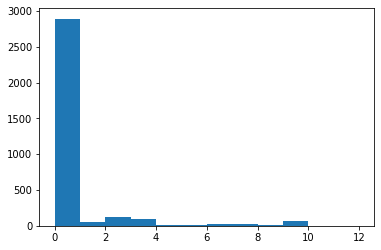

In [16]:

n, bins, patches = P.hist(clusterTotal,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12])
P.show()

In [22]:
len(clusterTotal)

2575

In [23]:
len(profilesVectors[0])

3

## to group back the data


In [17]:
totalIndex = 0
finalDic = {}
finalDic["HAD_RELATED"] = []
finalDic["POSITIVE_JOBS"] = []
finalDic["POSIBLE_JOBS"] = []
finalDic["TOTAL_JOBS"] = []
for profile in profilesVectors:
    lenP = len(profile)
    #print("total JOBs", lenP)
    totalPosJobs = 0
    possibleJobs = 0
    hadRealted = False
    ## se recorre el array de jobs para este perfil
    for jobI in range(0,lenP):
        job = profile[jobI]
        print(jobI,type(job) )
        if  type(job) == np.ndarray : 
            countSingleJob = clusterTotal[totalIndex]
            print(countSingleJob)
            possibleJobs+=1
            if countSingleJob>6:
                hadRealted = True
                totalPosJobs+=1
            totalIndex+=1
        else:
            totalIndex+=1
    finalDic["HAD_RELATED"].append(hadRealted)
    finalDic["POSITIVE_JOBS"].append(totalPosJobs)
    finalDic["POSIBLE_JOBS"].append(possibleJobs)
    finalDic["TOTAL_JOBS"].append(lenP)

print(len(clusterTotal),totalIndex,finalDic)


darray'>
0.0
1 <class 'NoneType'>
0 <class 'numpy.ndarray'>
1.0
1 <class 'numpy.ndarray'>
2.0
2 <class 'NoneType'>
3 <class 'NoneType'>
4 <class 'NoneType'>
5 <class 'NoneType'>
6 <class 'NoneType'>
7 <class 'NoneType'>
0 <class 'NoneType'>
1 <class 'NoneType'>
2 <class 'NoneType'>
3 <class 'NoneType'>
4 <class 'NoneType'>
5 <class 'NoneType'>
0 <class 'numpy.ndarray'>
3.0
1 <class 'NoneType'>
0 <class 'numpy.ndarray'>
6.0
1 <class 'NoneType'>
2 <class 'NoneType'>
3 <class 'NoneType'>
4 <class 'NoneType'>
5 <class 'NoneType'>
6 <class 'NoneType'>
0 <class 'NoneType'>
1 <class 'NoneType'>
0 <class 'NoneType'>
1 <class 'NoneType'>
2 <class 'NoneType'>
3 <class 'NoneType'>
0 <class 'numpy.ndarray'>
6.0
1 <class 'numpy.ndarray'>
6.0
2 <class 'numpy.ndarray'>
9.0
3 <class 'numpy.ndarray'>
2.0
4 <class 'numpy.ndarray'>
9.0
5 <class 'numpy.ndarray'>
9.0
6 <class 'numpy.ndarray'>
2.0
7 <class 'NoneType'>
8 <class 'NoneType'>
9 <class 'NoneType'>
0 <class 'numpy.ndarray'>
7.0
1 <class 'numpy.nd

In [18]:

JOB_HIST_CLUS_DF = pd.DataFrame(finalDic)
JOB_HIST_CLUS_DF.to_excel("count_history_index.xlsx",index=False)
print(JOB_HIST_CLUS_DF, JOB_HIST_CLUS_DF.shape)

     HAD_RELATED  POSITIVE_JOBS  POSIBLE_JOBS  TOTAL_JOBS
0          False              0             0           2
1          False              0             1           6
2          False              0             3          13
3          False              0             0           6
4          False              0             0           8
..           ...            ...           ...         ...
555        False              0             1           5
556         True              1             3           5
557         True              2             3           5
558        False              0             0           5
559        False              0             2           5

[560 rows x 4 columns] (560, 4)
